In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib as plt

In [2]:
data = pd.read_csv('C:/Users/filip/Firs_task_Zeleznyak/stasic//data.csv')

array([[<AxesSubplot: title={'center': 'receipt_number'}>]], dtype=object)

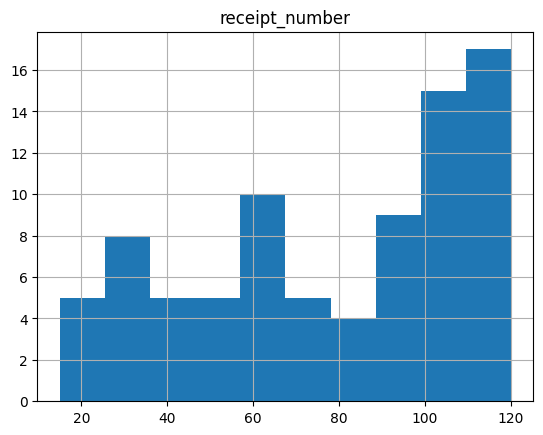

In [3]:
data.hist()

In [4]:
data.head(10)

,receipt_number,product
0,15,Передние тормозные колодки
1,15,Моторное масло
2,15,Масляный фильтр ДВС
3,20,Фильтр салона
4,20,Фильтр салона тонкой очистки
5,30,Свечи зажигания на моделях с бензиновым ДВС
6,30,Передние тормозные колодки
7,30,Задние тормозные колодки
8,30,Моторное масло
9,30,Воздушный фильтр ДВС


In [5]:
unique_receipts = data.receipt_number.unique()
print(len(unique_receipts))
unique_receipts

15


array([ 15,  20,  30,  40,  45,  50,  55,  60,  70,  75,  80,  90, 100,
       110, 120], dtype=int64)

In [6]:
unique_products = data['product'].unique()
print(len(unique_products))
unique_products

28


array(['Передние тормозные колодки', 'Моторное масло',
       'Масляный фильтр ДВС', 'Фильтр салона',
       'Фильтр салона тонкой очистки',
       'Свечи зажигания на моделях с бензиновым ДВС',
       'Задние тормозные колодки', 'Воздушный фильтр ДВС',
       'Топливный фильтр тонкой очистки', 'Щетки стеклоочистителя',
       'Масло в коробке передач', 'Жидкость ГУР',
       'Масляный фильтр коробки передач', 'Тормозная жидкость',
       'Приводной ремень', 'Основной аккумулятор', 'Рычаги подвески',
       'Шрусы или их составные части',
       'Свечи накаливания на моделях с дизельным ДВС"',
       'Стойки (тяги) стабилизатора', 'Тормозные диски',
       'Ступичный подшипник на передней и задней паре колёс',
       'Сальники ступицы на передней и задней паре колёс',
       'Зимний и летний комплект шин', 'Топливный насос',
       'Термостат системы охлаждения ДВС',
       'Термостат AGR/EGR на моделях с охлаждением рециркулируемых ОГ',
       'Смазка в шрусах, пыльники и хомуты'], dt

In [7]:
data_np = data.to_numpy()
data_np[:5]

array([[15, 'Передние тормозные колодки'],
       [15, 'Моторное масло'],
       [15, 'Масляный фильтр ДВС'],
       [20, 'Фильтр салона'],
       [20, 'Фильтр салона тонкой очистки']], dtype=object)

In [8]:
group_products_receipts = []
for i in unique_receipts:
    micro_data = []
    for j in data_np:
        if j[0] == i:
            micro_data.append(j[1])
    group_products_receipts.append(micro_data)

In [9]:
dataframe = pd.DataFrame({'receipt' : unique_receipts,
                  
                          'product' : group_products_receipts}, 
                                columns=['receipt','product'])
dataframe

,receipt,product
0,15,"[Передние тормозные колодки, Моторное масло, М..."
1,20,"[Фильтр салона, Фильтр салона тонкой очистки]"
2,30,"[Свечи зажигания на моделях с бензиновым ДВС, ..."
3,40,"[Передние тормозные колодки, Фильтр салона, Фи..."
4,45,"[Моторное масло, Масляный фильтр ДВС]"
5,50,"[Передние тормозные колодки, Масло в коробке п..."
6,55,[Тормозная жидкость]
7,60,"[Свечи зажигания на моделях с бензиновым ДВС, ..."
8,70,"[Приводной ремень, Передние тормозные колодки,..."
9,75,"[Моторное масло, Масляный фильтр ДВС]"


In [10]:
procent_product_in_receipt = []

In [11]:
len_dataframe = len(dataframe)
len_dataframe

15

In [59]:
count_product_procent_ = []
for x in unique_products:
    count_product = 0
    for i in group_products_receipts:
        switch = False
        for j in i:
            if j == x:
                switch = True
        if switch:
            count_product += 1
    count_product_procent_.append(count_product)
for i in range(len(count_product_procent)):
    count_product_procent_[i] = round(count_product_procent_[i]/len_dataframe, 2)
count_product_procent_

[0.73,
 0.6,
 0.6,
 0.4,
 0.4,
 0.27,
 0.27,
 0.27,
 0.27,
 0.27,
 0.13,
 0.13,
 0.13,
 0.13,
 0.07,
 0.07,
 0.07,
 0.07,
 0.07,
 0.07,
 0.07,
 0.07,
 0.07,
 0.07,
 0.07,
 0.07,
 0.07,
 0.07]

In [62]:
count_product_procent = []
for i in range(len(count_product_procent_)):
    if count_product_procent_[i] >= 0.2:
        count_product_procent.append([unique_products[i], count_product_procent_[i]])
count_product_procent

[['Передние тормозные колодки', 0.73],
 ['Моторное масло', 0.6],
 ['Масляный фильтр ДВС', 0.6],
 ['Фильтр салона', 0.4],
 ['Фильтр салона тонкой очистки', 0.4],
 ['Свечи зажигания на моделях с бензиновым ДВС', 0.27],
 ['Задние тормозные колодки', 0.27],
 ['Воздушный фильтр ДВС', 0.27],
 ['Топливный фильтр тонкой очистки', 0.27],
 ['Щетки стеклоочистителя', 0.27]]

In [63]:
mass_two_product = []
for i in range(len(count_product_procent)-1):
    for j in range(i + 1, len(count_product_procent)):
        mass_two_product.append([count_product_procent[i][0], count_product_procent[j][0]])
mass_two_product

[['Передние тормозные колодки', 'Моторное масло'],
 ['Передние тормозные колодки', 'Масляный фильтр ДВС'],
 ['Передние тормозные колодки', 'Фильтр салона'],
 ['Передние тормозные колодки', 'Фильтр салона тонкой очистки'],
 ['Передние тормозные колодки', 'Свечи зажигания на моделях с бензиновым ДВС'],
 ['Передние тормозные колодки', 'Задние тормозные колодки'],
 ['Передние тормозные колодки', 'Воздушный фильтр ДВС'],
 ['Передние тормозные колодки', 'Топливный фильтр тонкой очистки'],
 ['Передние тормозные колодки', 'Щетки стеклоочистителя'],
 ['Моторное масло', 'Масляный фильтр ДВС'],
 ['Моторное масло', 'Фильтр салона'],
 ['Моторное масло', 'Фильтр салона тонкой очистки'],
 ['Моторное масло', 'Свечи зажигания на моделях с бензиновым ДВС'],
 ['Моторное масло', 'Задние тормозные колодки'],
 ['Моторное масло', 'Воздушный фильтр ДВС'],
 ['Моторное масло', 'Топливный фильтр тонкой очистки'],
 ['Моторное масло', 'Щетки стеклоочистителя'],
 ['Масляный фильтр ДВС', 'Фильтр салона'],
 ['Масляны

In [64]:
suported_mass_two_product_ = []
for x in mass_two_product:
    count = 0
    for i in group_products_receipts:
        if x[0] in i and x[1] in i:
            count += 1
    suported_mass_two_product_.append(count)
for i in range(len(suported_mass_two_product_)):
    suported_mass_two_product_[i] = round(suported_mass_two_product_[i] * 100 / len_dataframe, 2)
suported_mass_two_product = []
for i in range(len(mass_two_product)):
    suported_mass_two_product.append([mass_two_product[i][0], mass_two_product[i][1], suported_mass_two_product_[i]])
for i in range(len(suported_mass_two_product)):
    print(f'{suported_mass_two_product[i][0]}, {suported_mass_two_product[i][1]} = {suported_mass_two_product[i][2]}%')

Передние тормозные колодки, Моторное масло = 46.67%
Передние тормозные колодки, Масляный фильтр ДВС = 46.67%
Передние тормозные колодки, Фильтр салона = 33.33%
Передние тормозные колодки, Фильтр салона тонкой очистки = 33.33%
Передние тормозные колодки, Свечи зажигания на моделях с бензиновым ДВС = 26.67%
Передние тормозные колодки, Задние тормозные колодки = 26.67%
Передние тормозные колодки, Воздушный фильтр ДВС = 26.67%
Передние тормозные колодки, Топливный фильтр тонкой очистки = 26.67%
Передние тормозные колодки, Щетки стеклоочистителя = 26.67%
Моторное масло, Масляный фильтр ДВС = 60.0%
Моторное масло, Фильтр салона = 20.0%
Моторное масло, Фильтр салона тонкой очистки = 20.0%
Моторное масло, Свечи зажигания на моделях с бензиновым ДВС = 26.67%
Моторное масло, Задние тормозные колодки = 26.67%
Моторное масло, Воздушный фильтр ДВС = 26.67%
Моторное масло, Топливный фильтр тонкой очистки = 26.67%
Моторное масло, Щетки стеклоочистителя = 26.67%
Масляный фильтр ДВС, Фильтр салона = 20

In [70]:
reliability_mass_two_product_ = []
reliability_mass_two_product__ = []
for x in mass_two_product:
    count = 0
    for i in group_products_receipts:
        if x[0] in i and x[1] in i:
            count += 1
    reliability_mass_two_product_.append(count)
for x in mass_two_product:
    count_firs = 0
    for i in group_products_receipts:
        if x[0] in i:
            count_firs += 1
    reliability_mass_two_product__.append(count_firs)
for i in range(len(suported_mass_two_product)):
    reliability_mass_two_product_[i] = round(reliability_mass_two_product_[i] * 100 / reliability_mass_two_product__[i], 2)
reliability_mass_two_product = []
for i in range(len(mass_two_product)):
    reliability_mass_two_product.append([mass_two_product[i][0], mass_two_product[i][1], reliability_mass_two_product_[i]])
for i in range(len(reliability_mass_two_product)):
    print(f'{reliability_mass_two_product[i][0]}, {reliability_mass_two_product[i][1]} = {reliability_mass_two_product[i][2]}')

Передние тормозные колодки, Моторное масло = 63.64
Передние тормозные колодки, Масляный фильтр ДВС = 63.64
Передние тормозные колодки, Фильтр салона = 45.45
Передние тормозные колодки, Фильтр салона тонкой очистки = 45.45
Передние тормозные колодки, Свечи зажигания на моделях с бензиновым ДВС = 36.36
Передние тормозные колодки, Задние тормозные колодки = 36.36
Передние тормозные колодки, Воздушный фильтр ДВС = 36.36
Передние тормозные колодки, Топливный фильтр тонкой очистки = 36.36
Передние тормозные колодки, Щетки стеклоочистителя = 36.36
Моторное масло, Масляный фильтр ДВС = 100.0
Моторное масло, Фильтр салона = 33.33
Моторное масло, Фильтр салона тонкой очистки = 33.33
Моторное масло, Свечи зажигания на моделях с бензиновым ДВС = 44.44
Моторное масло, Задние тормозные колодки = 44.44
Моторное масло, Воздушный фильтр ДВС = 44.44
Моторное масло, Топливный фильтр тонкой очистки = 44.44
Моторное масло, Щетки стеклоочистителя = 44.44
Масляный фильтр ДВС, Фильтр салона = 33.33
Масляный ф

In [72]:
lift_mass_two_product_ = []
lift_mass_two_product__ = []

for i in range(len(reliability_mass_two_product)):
    lift_mass_two_product_.append(reliability_mass_two_product[i][2])

for x in mass_two_product:
    count_second = 0
    for i in group_products_receipts:
        if x[1] in i:
            count_second += 1
    lift_mass_two_product__.append(count_second)

for i in range(len(lift_mass_two_product_)):
    lift_mass_two_product__[i] = round(lift_mass_two_product__[i] * 100 / len_dataframe)


lift_mass_two_product = []
for i in range(len(mass_two_product)):
    lift_mass_two_product.append([mass_two_product[i][0], mass_two_product[i][1], round(lift_mass_two_product_[i]/lift_mass_two_product__[i], 2)])


for i in range(len(lift_mass_two_product)):
    print(f'{lift_mass_two_product[i][0]}, {lift_mass_two_product[i][1]} = {lift_mass_two_product[i][2]}')

Передние тормозные колодки, Моторное масло = 1.06
Передние тормозные колодки, Масляный фильтр ДВС = 1.06
Передние тормозные колодки, Фильтр салона = 1.14
Передние тормозные колодки, Фильтр салона тонкой очистки = 1.14
Передние тормозные колодки, Свечи зажигания на моделях с бензиновым ДВС = 1.35
Передние тормозные колодки, Задние тормозные колодки = 1.35
Передние тормозные колодки, Воздушный фильтр ДВС = 1.35
Передние тормозные колодки, Топливный фильтр тонкой очистки = 1.35
Передние тормозные колодки, Щетки стеклоочистителя = 1.35
Моторное масло, Масляный фильтр ДВС = 1.67
Моторное масло, Фильтр салона = 0.83
Моторное масло, Фильтр салона тонкой очистки = 0.83
Моторное масло, Свечи зажигания на моделях с бензиновым ДВС = 1.65
Моторное масло, Задние тормозные колодки = 1.65
Моторное масло, Воздушный фильтр ДВС = 1.65
Моторное масло, Топливный фильтр тонкой очистки = 1.65
Моторное масло, Щетки стеклоочистителя = 1.65
Масляный фильтр ДВС, Фильтр салона = 0.83
Масляный фильтр ДВС, Фильтр 

In [89]:
Dataframe_ = []
for i in range(len(mass_two_product)):
    mass = []
    mass.append(suported_mass_two_product[i][-1])
    mass.append(reliability_mass_two_product[i][-1])
    mass.append(lift_mass_two_product[i][-1])
    Dataframe_.append(mass)
index_ = []
for i in range(len(mass_two_product)):
    string = f'{mass_two_product[i][0]}, {mass_two_product[i][1]}'
    index_.append(string)

<AxesSubplot: >

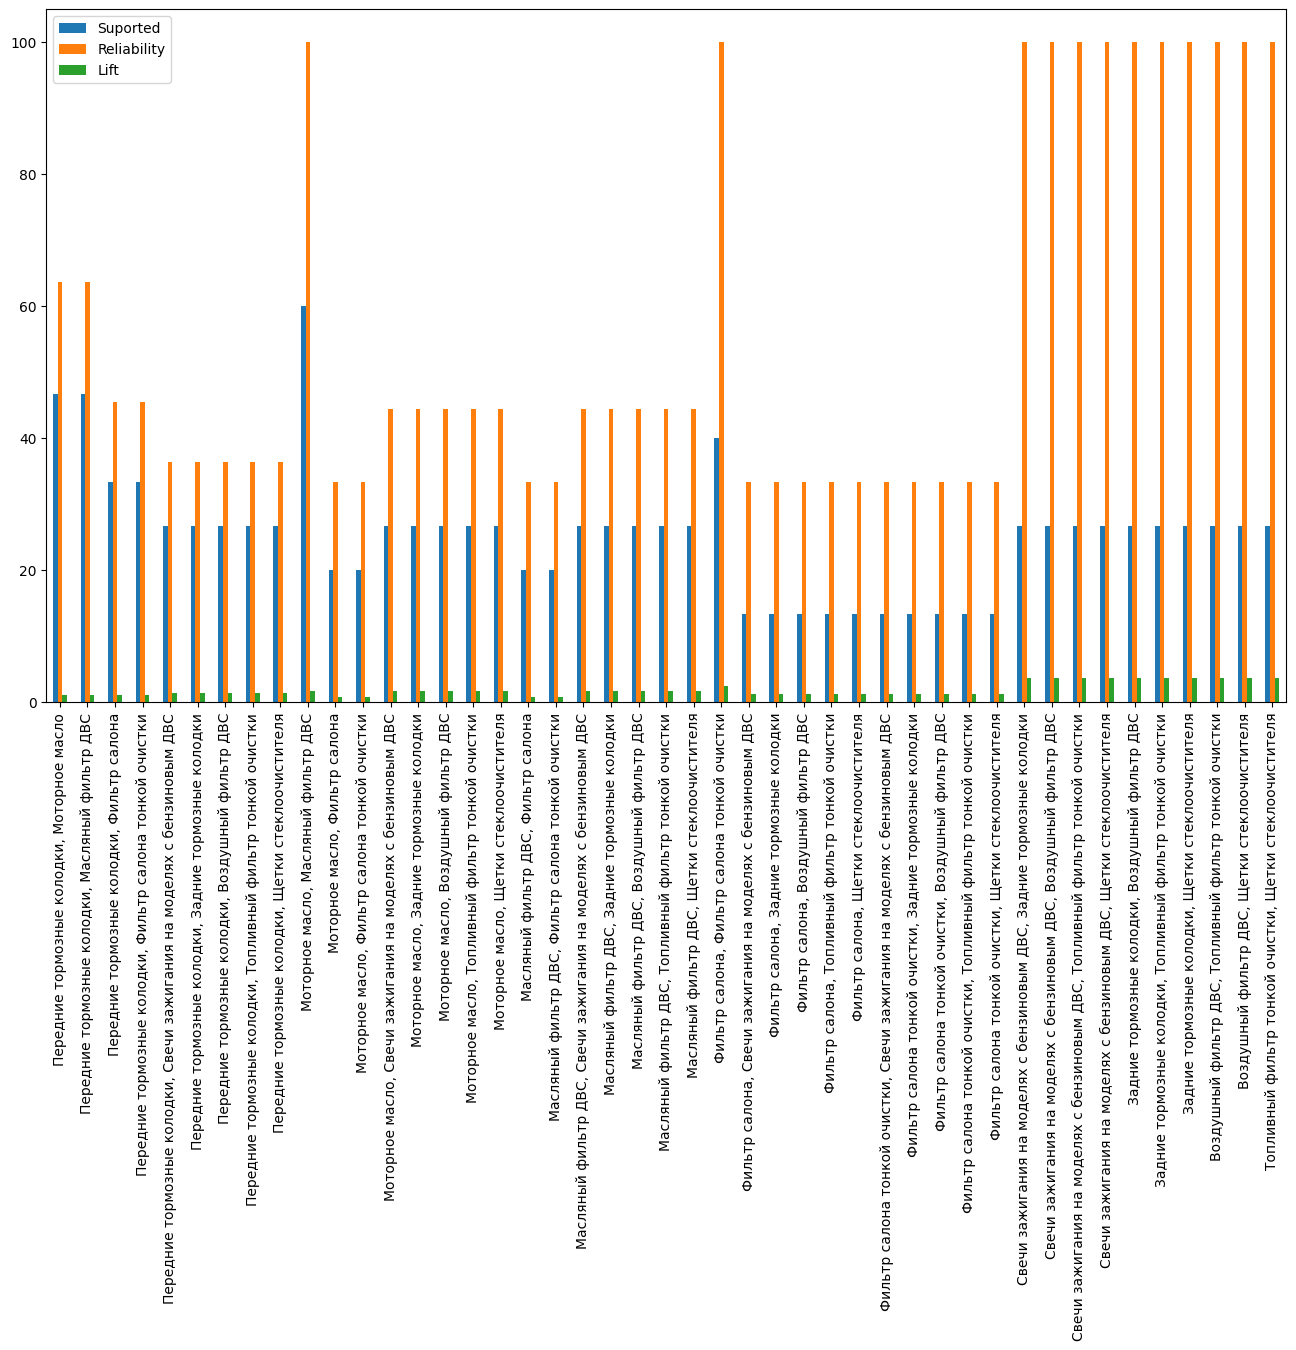

In [90]:
Dataframe = pd.DataFrame(Dataframe_, columns =['Suported', 'Reliability', 'Lift'], index=index_) 
Dataframe.plot.bar(figsize=(16,9))

In [91]:
Dataframe

,Suported,Reliability,Lift
"Передние тормозные колодки, Моторное масло",46.67,63.64,1.06
"Передние тормозные колодки, Масляный фильтр ДВС",46.67,63.64,1.06
"Передние тормозные колодки, Фильтр салона",33.33,45.45,1.14
"Передние тормозные колодки, Фильтр салона тонкой очистки",33.33,45.45,1.14
"Передние тормозные колодки, Свечи зажигания на моделях с бензиновым ДВС",26.67,36.36,1.35
"Передние тормозные колодки, Задние тормозные колодки",26.67,36.36,1.35
"Передние тормозные колодки, Воздушный фильтр ДВС",26.67,36.36,1.35
"Передние тормозные колодки, Топливный фильтр тонкой очистки",26.67,36.36,1.35
"Передние тормозные колодки, Щетки стеклоочистителя",26.67,36.36,1.35
"Моторное масло, Масляный фильтр ДВС",60.00,100.00,1.67
